<h1 align=center style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
پزشک قطعه‌ها
</font>
</h1>

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مقدمه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این تمرین قصد داریم تا آستانه گذاری را روی تصاویر پزشکی بررسی کنیم و کاربردهای مختلف آنرا مشاهده کنیم.
</font>
</p>

In [22]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش اول: قطعه‌بندی اسکلت
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش می‌خواهیم با استفاده از آستانه‌گذاری، اسکلت موجود در تصویر را از پیش‌زمینه متمایز کنیم. در ادامه با جزئیات این بخش بیشتر آشنا خواهیم شد.
</font>
</p>

---

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله اول: وارد کردن تصویر
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا تصویر زیر را بصورت خاکستری بخوانید.
<br>
Data/Skeleton.tif
</font>
</p>


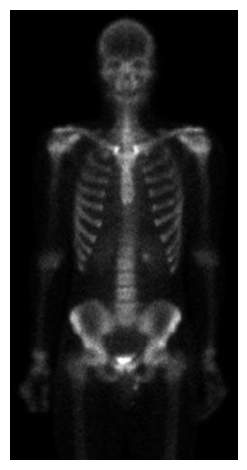

In [23]:
img_skeleton = cv2.imread("./Data/Skeleton.tif", cv2.IMREAD_GRAYSCALE)
plt.axis("off")
plt.imshow(img_skeleton, "gray")
plt.tight_layout()
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله دوم: تشخیص آستانه
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این قسمت تصویر اسکلت را با استفاده از روش اتسو قطعه‌بندی کنید. ابتدا آستانه را پیدا کنید و سپس تصویر قطعه‌بندی شده را ذخیره کنید.
</font>
</p>

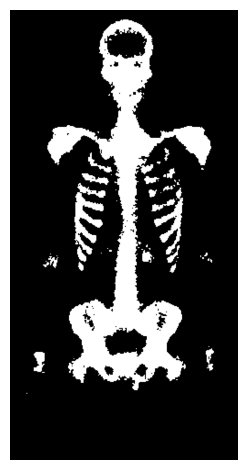

In [24]:
otsu_threshold, image_segment = cv2.threshold(
    img_skeleton, 0, 255, cv2.THRESH_BINARY + cv2.THRESH_OTSU
)

plt.axis("off")
plt.imshow(image_segment, "gray")
plt.tight_layout()
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله سوم: ذخیره تصویر</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تصویر قطعه‌بندی شده را با نام زیر ذخیره کنید. دقت کنید که تصویر را حتما به شکل RGB ذخیره کنید.
<br>
segment_skeleton.tif
</font>
</p>

In [25]:
cv2.imwrite("segment_skeleton.tif",cv2.cvtColor(image_segment,cv2.COLOR_GRAY2RGB))

True

<h2 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
بخش دوم: قطعه‌بندی قفسه سینه
</font>
</h2>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
در این بخش می‌خواهیم که عکس x-ray قفسه سینه یک انسان را قطعه‌بندی کنیم. در ادامه با مراحل اینکار آشنا خواهید شد.
</font>
</p>

---

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله اول: وارد کردن تصویر
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
ابتدا تصویر زیر را بصورت خاکستری بخوانید.
<br>
Data/chest.webp
</font>
</p>


In [26]:
img_chest = cv2.imread("./Data/chest.webp", cv2.IMREAD_GRAYSCALE)

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله سوم: اعمال آستانه‌گذاری باندی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
تصویر را با توجه به باندهای زیر آستانه‌گذاری کنید.
<br>
</font>
</p>

$$
D = \left\{ (0, 50), (51, 100), (101, 150), (151, 200), (201, 255) \right\}
$$

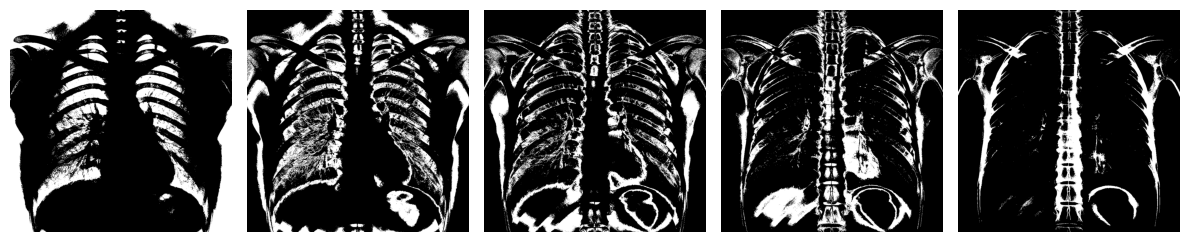

In [27]:
D = [(0, 50), (51, 100), (101, 150), (151, 200), (201, 255)]

ranges = {}

for r in D:
    ranges[r] = cv2.inRange(img_chest, r[0], r[1])  # type: ignore

plt.figure(figsize=(12, 30))

for i, e in enumerate(D):
    plt.subplot(1, 5, i + 1)
    plt.axis("off")
    plt.imshow(ranges[e], "gray")

plt.tight_layout()
plt.show()

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله چهارم: ذخیره‌سازی
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
خروجی هر باند را با نام‌های زیر ذخیره کنید. دقت کنید که تصاویر را به شکل RGB ذخیره کنید.
<br>
chest_0_50.jpg
<br>
chest_51-100.jpg
<br>
chest_101_150.jpg
<br>
chest_151_200.jpg
<br>
chest_201_255.jpg
</font>
</p>

In [28]:
for r in D:
    cv2.imwrite(f"chest_{r[0]}_{r[1]}.jpg",ranges[r])

<h3 align=right style="line-height:200%;font-family:vazir;color:#0099cc">
<font face="vazir" color="#0099cc">
مرحله پنجم: سلول جواب‌ساز
</font>
</h3>

<p dir=rtl style="direction: rtl;text-align: right;line-height:200%;font-family:vazir;font-size:medium">
<font face="vazir" size=3>
بدون هیچگونه تغییری، این سلول را اجرا کنید تا فایل پاسخ شما آماده شود.
</font>
</p>

In [29]:
import zipfile

def compress(file_names):
    print("File Paths:")
    print(file_names)
    # Select the compression mode ZIP_DEFLATED for compression
    # or zipfile.ZIP_STORED to just store the file
    compression = zipfile.ZIP_DEFLATED
    # create the zip file first parameter path/name, second mode
    with zipfile.ZipFile("result.zip", mode="w") as zf:
        for file_name in file_names:
            # Add file to the zip file
            # first parameter file to zip, second filename in zip
            zf.write('./' + file_name, file_name, compress_type=compression)


file_names = ["notebook.ipynb", "segment_skeleton.tif", 'chest_0_50.jpg', 'chest_51_100.jpg', 'chest_101_150.jpg', 'chest_151_200.jpg', 'chest_201_255.jpg']
compress(file_names)

File Paths:
['notebook.ipynb', 'segment_skeleton.tif', 'chest_0_50.jpg', 'chest_51_100.jpg', 'chest_101_150.jpg', 'chest_151_200.jpg', 'chest_201_255.jpg']
